In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
data_orig = pd.read_csv('../csv (2010-21)/laliga_points_table_2020-21.csv')
played_matches = data_orig["played"][0]
print(played_matches)
print(data_orig)


38
    position             team  played  won  drawn  lost  goals_for   
0          1  Atlético Madrid      38   26      8     4         67  \
1          2      Real Madrid      38   25      9     4         67   
2          3        Barcelona      38   24      7     7         85   
3          4          Sevilla      38   24      5     9         53   
4          5    Real Sociedad      38   17     11    10         59   
5          6       Real Betis      38   17     10    11         50   
6          7       Villarreal      38   15     13    10         60   
7          8       Celta Vigo      38   14     11    13         55   
8          9          Granada      38   13      7    18         47   
9         10  Athletic Bilbao      38   11     13    14         46   
10        11          Osasuna      38   11     11    16         37   
11        12            Cádiz      38   11     11    16         36   
12        13         Valencia      38   10     13    15         50   
13        14     

In [5]:
data = pd.read_csv('../normalized_data/normalized.csv')


In [6]:
# Check for missing values and data types
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   position         1328 non-null   int64  
 1   team             1328 non-null   object 
 2   played           1328 non-null   int64  
 3   won              1328 non-null   float64
 4   drawn            1328 non-null   float64
 5   lost             1328 non-null   float64
 6   goals_for        1328 non-null   float64
 7   goals_against    1328 non-null   float64
 8   goal_difference  1328 non-null   float64
 9   points           1328 non-null   float64
 10  year             1328 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 114.2+ KB
None


In [7]:
data['Win Percentage'] = data['won'] / data['played']
data['Goals Per Game'] = data['goals_for'] / data['played']
data['Goals Against Per Game'] = data['goals_against'] / data['played']
data['Goal Difference Per Game'] = data['goal_difference'] / data['played']


In [8]:
print(data['year'])


0       1950
1       1950
2       1950
3       1950
4       1950
        ... 
1323    2021
1324    2021
1325    2021
1326    2021
1327    2021
Name: year, Length: 1328, dtype: int64


In [9]:
train_data = data[data['year'] < 2020]
test_data = data[data['year'] == 2020]

features = ['won', 'drawn', 'lost', 'goals_for', 'goal_difference',
            'Win Percentage', 'Goals Per Game', 'Goal Difference Per Game']
target = 'points'


rf_model = RandomForestRegressor(
    n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(train_data[features], train_data[target])


RandomForestRegressor(max_depth=5, random_state=42)

In [10]:
y_pred = rf_model.predict(test_data[features])
mse = mean_squared_error(test_data[target], y_pred)
r2_error = r2_score(test_data[target], y_pred)
print("Mean Squared Error: ", mse)
print("R-squared Score: ", r2_error)


Mean Squared Error:  60.77717293055663
R-squared Score:  0.7387575093541325


In [28]:
test_data[features]


,won,drawn,lost,goals_for,goal_difference,Win Percentage,Goals Per Game,Goal Difference Per Game
1288,20.526316,6.315789,3.157895,0.067,0.042,0.684211,0.002233,0.001400
1289,19.736842,7.105263,3.157895,0.067,0.039,0.657895,0.002233,0.001300
1290,18.947368,5.526316,5.526316,0.085,0.047,0.631579,0.002833,0.001567
1291,18.947368,3.947368,7.105263,0.053,0.020,0.631579,0.001767,0.000667
1292,13.421053,8.684211,7.894737,0.059,0.021,0.447368,0.001967,0.000700
1293,13.421053,7.894737,8.684211,0.050,0.000,0.447368,0.001667,0.000000
1294,11.842105,10.263158,7.894737,0.060,0.016,0.394737,0.002000,0.000533
1295,11.052632,8.684211,10.263158,0.055,-0.002,0.368421,0.001833,-0.000067
1296,10.263158,5.526316,14.210526,0.047,-0.018,0.342105,0.001567,-0.000600
1297,8.684211,10.263158,11.052632,0.046,0.004,0.289474,0.001533,0.000133


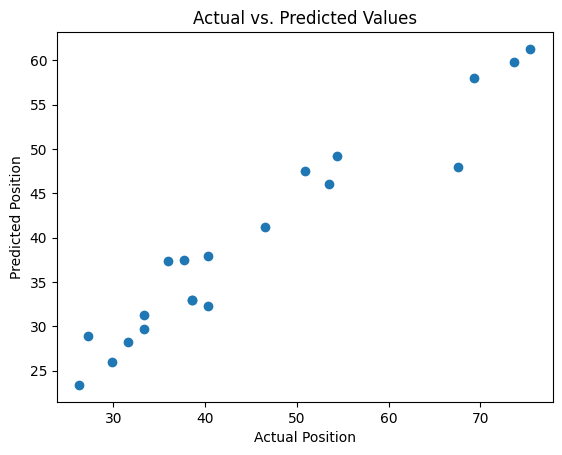

In [11]:
plt.scatter(test_data[target], y_pred)
plt.xlabel("Actual Position")
plt.ylabel("Predicted Position")
plt.title("Actual vs. Predicted Values")
plt.show()


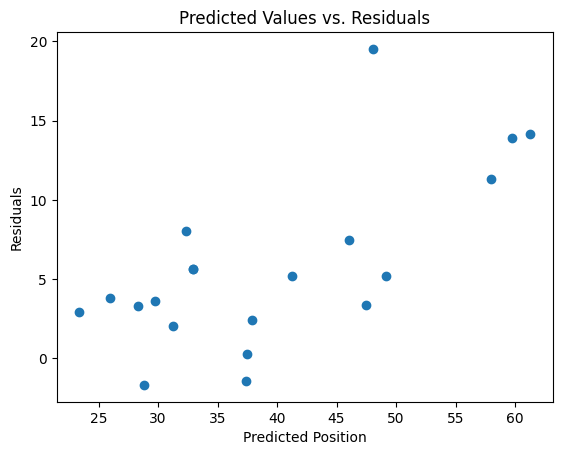

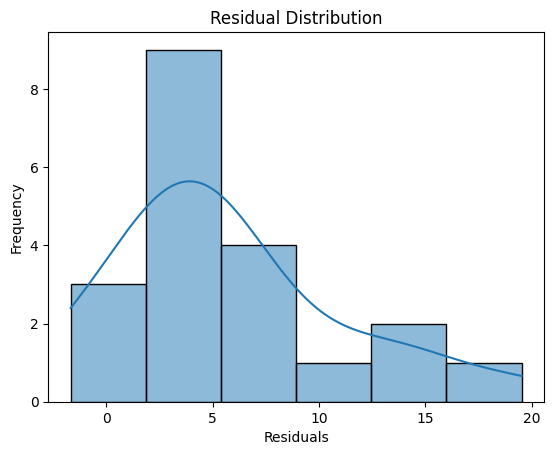

In [12]:
# Create a scatter plot of predicted values vs. residuals
plt.scatter(y_pred, test_data[target] - y_pred)
plt.xlabel("Predicted Position")
plt.ylabel("Residuals")
plt.title("Predicted Values vs. Residuals")
plt.show()

# Create a histogram of residuals
sns.histplot(test_data[target] - y_pred, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


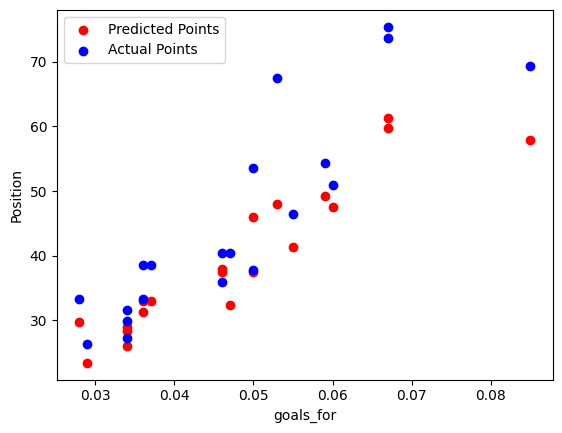

In [13]:
import matplotlib.pyplot as plt
plt.scatter(test_data["goals_for"], y_pred,
            color='red', label='Predicted Points')

plt.scatter(test_data["goals_for"], test_data[target],
            color='blue', label='Actual Points')

plt.xlabel("goals_for")
plt.ylabel("Position")
plt.legend()

plt.show()


                    feature  importance
2                      lost    0.598121
0                       won    0.098219
5            Win Percentage    0.097623
3                 goals_for    0.075504
6            Goals Per Game    0.069194
4           goal_difference    0.025711
7  Goal Difference Per Game    0.023470
1                     drawn    0.012157


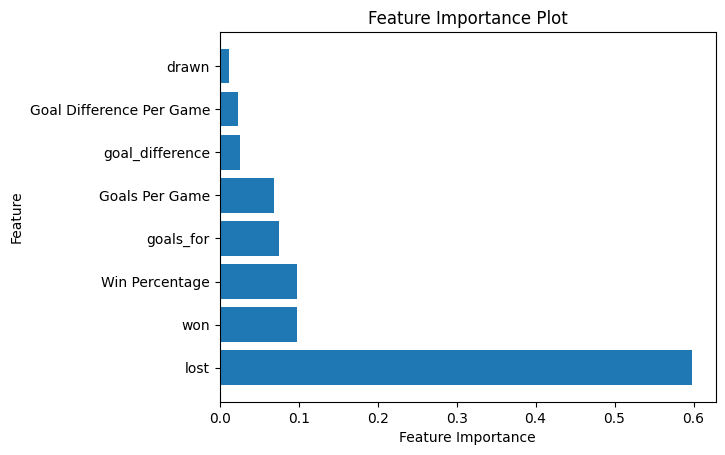

In [27]:

coef_df = pd.DataFrame(
    {'feature': test_data[features].columns, 'importance': rf_model.feature_importances_})
coef_df = coef_df.sort_values(by='importance', ascending=False)
print(coef_df)

plt.barh(coef_df['feature'], coef_df['importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")
plt.show()


In [15]:
from sklearn.metrics import r2_score, mean_absolute_error

mae = mean_absolute_error(test_data[target], y_pred)


accuracy = (1 - (mae / test_data[target].mean())) * 100


print("Percentage Accuracy:", accuracy)


Percentage Accuracy: 86.6104065779026


In [16]:
# print(y_pred)
print(len(y_pred))
y_pred.sort()
y_pred = np.flip(y_pred)
print(y_pred)
print(len(y_pred))


20
[61.28660616 59.77003663 57.97221213 49.17032801 48.02325049 47.47768163
 46.04528125 41.26121724 37.92202065 37.43585063 37.38490354 32.92701202
 32.92701202 32.34524816 31.25835844 29.72283171 28.86355223 28.27698065
 26.00401201 23.39908774]
20


In [26]:
print("rank", "team", "predicted_2020", "original_2020")
rank_list = []
team_list = []
predict_points = []
original_points = []

for i in range(0, len(y_pred)):
    points = (y_pred[i]*played_matches*3)/100
    # print(i+1, test_data.iloc[i]['team'],
    #       round(points), data_orig["points"][i])
    rank_list.append(i+1)
    team_list.append(test_data.iloc[i]["team"])
    predict_points.append(round(points))
    original_points.append(data_orig["points"][i])

result_dict = {
    "rank": rank_list,
    "team": team_list,
    "predict_2020": predict_points,
    "original_2020": original_points
}
result_df = pd.DataFrame(result_dict)
result_df


rank team predicted_2020 original_2020


,rank,team,predict_2020,original_2020
0,1,Atlético Madrid,70,86
1,2,Real Madrid,68,84
2,3,Barcelona,66,79
3,4,Sevilla,56,77
4,5,Real Sociedad,55,62
5,6,Real Betis,54,61
6,7,Villarreal,52,58
7,8,Celta Vigo,47,53
8,9,Granada,43,46
9,10,Athletic Bilbao,43,46
